In [1]:
import pickle # 객체 입출력을 위한 라이브러리
from sklearn.model_selection import train_test_split # 훈련 데이터, 테스트 데이터 분리
from sklearn.preprocessing import StandardScaler # 정규화
from sklearn.ensemble import RandomForestClassifier # 랜덤포레스트 분류 알고리즘
import pandas as pd
#from sklearn.decomposition import PCA

# 모델 평가를 위한 metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [2]:
# monitored label=0~95 / unmonitored label=-1로 한 dataset 불러오기
multi=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/open_multi.csv")
multi.head()

,N_in_packets,N_out_packets,in_first_thirty,out_first_thirty,out_fraction,in_fraction,out_std,in_std,out_mean,in_mean,N_packets,time_fraction,sum_N,y
0,1300,121,21,9,0.085151,0.914849,398.486335,515.483953,705.106154,774.322314,1421,2842.0,140.138067,0
1,438,80,22,8,0.154440,0.845560,150.591146,139.231951,265.406393,227.162500,518,1036.0,50.984252,0
2,1240,118,23,7,0.086892,0.913108,381.878642,472.735508,669.259677,787.110169,1358,2716.0,122.232223,0
3,1324,122,21,9,0.084371,0.915629,406.205288,513.916038,714.503021,821.139344,1446,2892.0,108.233533,0
4,1291,115,22,8,0.081792,0.918208,395.028889,503.993490,695.740511,790.608696,1406,2812.0,132.142857,0


In [3]:
# 정답값 아닌 애들 분리
X= multi.drop('y', axis=1)
# 목표변수 분리(정답값. 어느 클래스 label에 해당하는지 해당 열)
y = multi['y']

In [4]:
# train, test 데이터 분리

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3, random_state = 1)

# 데이터 스케일링(normalize data)

# 표준 스케일러(평균 0, 분산 1)
#scaler = StandardScaler()
#X_train= scaler.fit_transform(X_train)
#X_test= scaler.fit_transform(X_test)

In [ ]:
# PCA를 사용하여 데이터 차원 축소
#n_components = 0  # 상황에 따라 조절
#pca = PCA(n_components=n_components)
#X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)

In [ ]:
#def k_fingerprinting_classification(model, X_test, k):
    # k 개의 가장 가까운 이웃으로 분류
   # y_pred_k = model.predict(X_test[:, :k])
   # return y_pred_k

In [ ]:
# Perform PCA for dimensionality reduction
#pca = PCA(n_components=0.8)  # You can experiment with different values
#X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)

In [11]:
clf2 = RandomForestClassifier(n_estimators=150, criterion="gini", max_depth=20, min_samples_split=2, min_samples_leaf=1, random_state=0)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('accuracy_score : ',acc)


accuracy_score :  0.8418390804597701


In [14]:
# GridSearch로 최적의 하이퍼 파라미터 튜닝

from sklearn.model_selection import GridSearchCV

params = {'n_estimators' : [100, 150, 200],
          'max_depth' : [30, 50, 70],
          'min_samples_leaf' : [1, 2, 4, 6],
          'min_samples_split' : [2, 4, 6],
          #'criterion' : ['gini', 'entropy']
          }


# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 221, n_jobs = -1)
grid = GridSearchCV(rf_clf, params, cv=3, refit = True, verbose = 3)
grid.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV 1/3] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.831 total time=   8.9s
[CV 2/3] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.833 total time=   6.5s
[CV 3/3] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.828 total time=   5.4s
[CV 1/3] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.831 total time=  11.7s
[CV 2/3] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.835 total time=   9.5s
[CV 3/3] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.828 total time=  12.6s
[CV 1/3] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.831 total time=  15.5s
[CV 2/3] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.835 total time= 

In [15]:
# 위의 결과로 나온 최적 하이퍼 파라미터로 테스트 세트 데이터에서 예측 성능을 측정
print('예측 정확도: {:.4f}'.format(grid.best_score_))
y_pred = grid.predict(X_test)

print('test 정확도: {:.4f}'.format(accuracy_score(y_test,y_pred)))
print('오차 행렬')
print(confusion_matrix( y_test, y_pred))
print(classification_report(y_test, y_pred))
#TPR=
#FPR=
#BDR=(TPR*0.65)/(TPR*0.65+FPR*0.35)
#print("BDR:", BDR )



예측 정확도: 0.8315
test 정확도: 0.8474
오차 행렬
[[2967    0    0 ...    0    0    0]
 [   0   38    0 ...    0    0    0]
 [   0    0   36 ...    0    0    0]
 ...
 [   0    0    0 ...   36    0    0]
 [   0    0    0 ...    0   55    0]
 [   0    2    0 ...    0    0   35]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      2967
           0       0.73      0.61      0.67        62
           1       0.84      0.55      0.67        65
           2       0.83      0.85      0.84        62
           3       0.81      0.83      0.82        63
           4       0.73      0.78      0.75        67
           5       0.90      0.83      0.86        52
           6       0.87      0.89      0.88        65
           7       0.74      0.87      0.80        61
           8       0.69      0.91      0.79        57
           9       0.77      0.83      0.79        75
          10       0.81      0.74      0.77        62
          11       0.72      0.

In [ ]:
# feature names 뽑기(header 제외)
a=multi.drop(['y'], axis=1)
column_headers=list(a.columns.values)

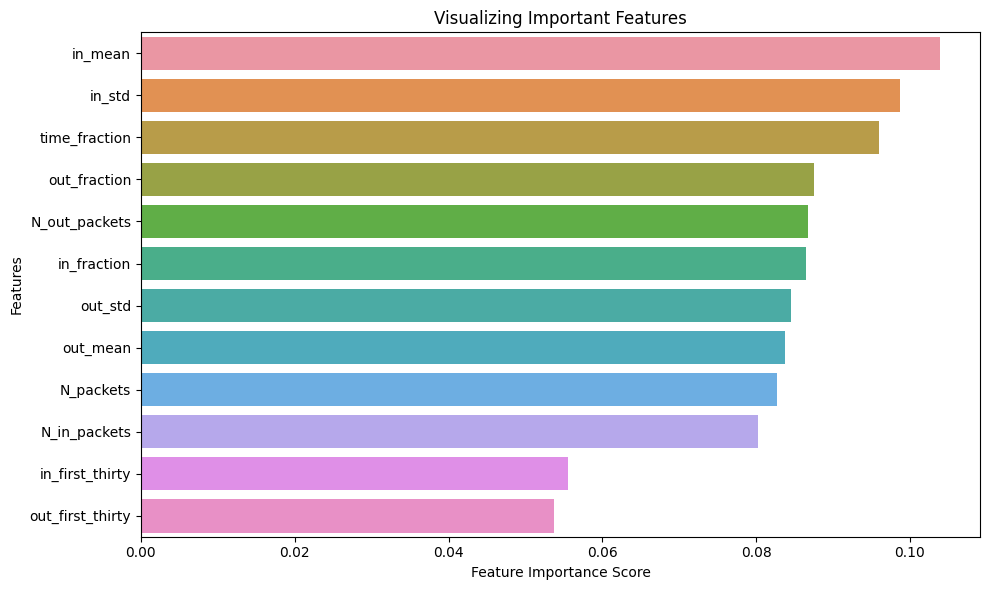

In [ ]:
# 5. Report the feature rankings with importance scores using the bar plot using barplot provided by seaborn library.

import seaborn as sns
import matplotlib.pyplot as plt


feature_imp = pd.Series(grid.best_estimator_.feature_importances_, index=column_headers).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()